# SiamIris Identity Verification Example

## Load Libraries 

In [1]:
import os
import cv2
import warnings
import numpy as np
from siamiris_embedding import siamiris_embedding

import matplotlib.pyplot as plt
%matplotlib inline

2023-02-06 21:57:41.032827: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-06 21:57:41.038790: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-06 21:57:41.039498: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Force to use CPU
#os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
#os.environ['CUDA_VISIBLE_DEVICES'] = ''

## Load Model

In [3]:
# Choose Backbone < 'resnet50' | 'mobilenet_v2' >
backbone = 'mobilenetv2'

# Initialize SiamIris Object
SiamIris = siamiris_embedding(backbone=backbone)

2023-02-06 21:57:41.612301: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-06 21:57:41.612969: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-06 21:57:41.613750: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-06 21:57:41.614338: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

## Load Samples

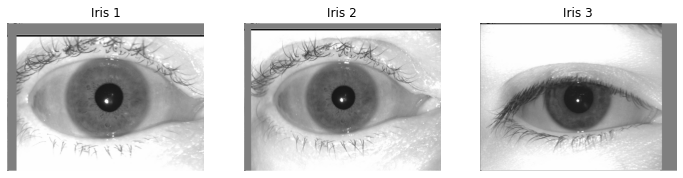

In [4]:
iris1 = cv2.cvtColor(cv2.imread('./samples/L02463d1890.png'), cv2.COLOR_BGR2RGB)
iris2 = cv2.cvtColor(cv2.imread('./samples/L02463d1892.png'), cv2.COLOR_BGR2RGB)
iris3 = cv2.cvtColor(cv2.imread('./samples/L05691d121.png'), cv2.COLOR_BGR2RGB)

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
ax1.imshow(iris1)
ax1.set_title('Iris 1')
ax1.axis('off')
ax2.imshow(iris2)
ax2.set_title('Iris 2')
ax2.axis('off')
ax3.imshow(iris3)
ax3.set_title('Iris 3')
ax3.axis('off')
plt.show()

## Get Embeddings

In [5]:
img1 = SiamIris.process_image(iris1)
img2 = SiamIris.process_image(iris2)
img3 = SiamIris.process_image(iris3)

In [6]:
emb1 = SiamIris.get_embedding(img1)
emb2 = SiamIris.get_embedding(img2)
emb3 = SiamIris.get_embedding(img3)

In [7]:
emb1

array([0.        , 0.00313808, 0.        , ..., 0.        , 0.01302024,
       0.        ], dtype=float32)

In [8]:
emb1.shape

(1792,)

## Compare Embeddings by hand

In [9]:
dist_12 = np.linalg.norm(emb1 - emb2, axis=0)
dist_13 = np.linalg.norm(emb1 - emb3, axis=0)
dist_23 = np.linalg.norm(emb2 - emb3, axis=0)

print('Comparissons:')
print(' - iris1 vs iris2 : {:0.4f}'.format(dist_12))
print(' - iris1 vs iris3 : {:0.4f}'.format(dist_13))
print(' - iris2 vs iris3 : {:0.4f}'.format(dist_23))

Comparissons:
 - iris1 vs iris2 : 0.5633
 - iris1 vs iris3 : 1.2302
 - iris2 vs iris3 : 1.2604


## Compare Embeddigs with SiamIris Object

In [10]:
dist_12 = SiamIris.compare(emb1, emb2)
dist_13 = SiamIris.compare(emb1, emb3)
dist_23 = SiamIris.compare(emb2, emb3)

print('Comparissons:')
print(' - iris1 vs iris2 : {:0.4f}'.format(dist_12))
print(' - iris1 vs iris3 : {:0.4f}'.format(dist_13))
print(' - iris2 vs iris3 : {:0.4f}'.format(dist_23))

Comparissons:
 - iris1 vs iris2 : 0.5633
 - iris1 vs iris3 : 1.2302
 - iris2 vs iris3 : 1.2604
